In [ ]:
#TRAVEL AGGREGATOR ANALYSIS - (PROJECT 1) - DATA ANALYSIS AND MACHINE LEARNING INTERNSHIP PROGRAM
SUBMITTED BY: Mythily Arunprasad
SUBMITTED TO: Tutor - Anu
DATE: December 2024

In [ ]:
Project - Travel Aggregator Analysis
A new Indian start-up, "MyNextBooking” is an aggregator on top of the available top platforms (Yatra, MMT, Goibibo).
It helps the user compare prices for their upcoming journeys on its platform and the customer is redirected to the desired platform 
after looking at the price.

In [ ]:
As a Data Analyst Using Python -- Performing Depth Analysis over the data collected from the csv files (Bookings.csv, Sessions.csv).
Pandas, Seaborn, and Matplotlib--popular Python libraries used for Data analysis and Visualization.

In [ ]:
"MyNextBooking: Revolutionizing Travel with Seamless Price Comparisons – A Big Thanks to Python for Making It Possible!"

In [ ]:
1. Find the number of distinct bookings,sessions and searches fron the given datasets.

In [7]:
import numpy as np
import pandas as pd

#### Inputs Start ####

bookingFname = 'Bookings.csv'
sessionFname = 'Sessions.csv'

#### Inputs End ####

import numpy as np
import pandas as pd

bookingdata=pd.read_csv(bookingFname)
sessiondata=pd.read_csv(sessionFname)

if len(bookingdata)<=0:
    print("Datas not available : bookingData" , bookingFname)
    
if len(sessiondata)<=0:
    print("Datas not available : SessionData" , sessionFname)

# nunique () function  will return an integer that tells you how many distinct values a column contains. 

# To get count on  unique Booking ID - we apply nunique() function to booking_id column in Bookings Csv file
unique_bookings = bookingdata['booking_id'].nunique()
print(f"Unique Booking IDs: {unique_bookings}")

# To get count on  unique Session ID - we apply nunique() function to session_id column in Sessions Csv file
unique_sessions = sessiondata['session_id'].nunique()
print(f"Unique Session IDs: {unique_sessions}")

# Count the unique search IDs.To get count on  unique Search ID - we apply nunique() function to search_id column in Sessions Csv file
unique_searches = sessiondata['search_id'].nunique()
print(f"Unique Search IDs: {unique_searches}")

Unique Booking IDs: 339
Unique Session IDs: 331
Unique Search IDs: 1360


In [ ]:
2.How many sessions have more than one booking?

In [32]:

# Grouping the session_id and booking_id by groupby () function  and checking  unique booking using nunique() function.
# groupbysyntax---groupby()[].functionname() 
bookingcounts = sessiondata.groupby('session_id')['booking_id'].nunique()

# Filtering  session_ids which has more than 1 booking
multiplebookings = bookingcounts[bookingcounts > 1]
print(multiplebookings)

#Total count of multiple_bookings
TotalCount = len(multiplebookings)

print(f"Total count of Multiple Bookings: {TotalCount}")


session_id
session_134    2
session_154    2
session_196    2
session_231    2
session_27     2
session_290    2
session_298    2
session_324    2
session_50     2
session_76     2
Name: booking_id, dtype: int64
Total count of Multiple Bookings: 10


In [ ]:
3. which days of the week have the highest number of booking? Also draw a pie chart to show the distribution for all days of the week?

booking_day
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64
The day with the highest number of bookings is Thursday with 65 bookings.


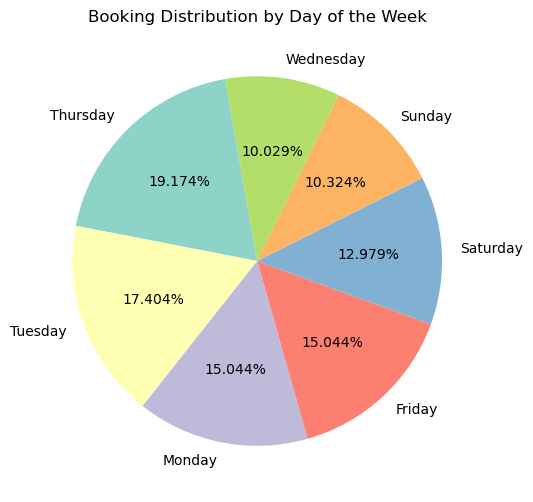

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
bookingdata = pd.read_csv('Bookings.csv')

# Converting the booking_time to datetime format using to_datetime () function which converts a column or a series of date/time values into datetime objects.

bookingdata['booking_time'] = pd.to_datetime(bookingdata['booking_time'], format='%Y-%m-%dT%H:%M:%SZ')
#print(bookingdata)

# from the converted boooking time we need to extract the days of the week using dt.day_name() function.
bookingdata['booking_day'] = bookingdata['booking_time'].dt.day_name()
#print(bookingdata)

# To get each days booking count use value_counts()
booking_day_summary = bookingdata['booking_day'].value_counts()
print(booking_day_summary)

# Inorder to find the day which has the highest number of bookings- use idxmax()function
highest_booking_day = booking_day_summary.idxmax()
highest_booking_count = booking_day_summary.max()

print(f"The day with the highest number of bookings is {highest_booking_day} with {highest_booking_count} bookings.")

# Using Pie chart to display the distributio of bookings for all days of the week
plt.figure(figsize=(8, 6))
plt.pie(booking_day_summary, labels=booking_day_summary.index, autopct='%1.3f%%', startangle=100, colors=plt.cm.Set3.colors)
plt.title('Booking Distribution by Day of the Week')
plt.show()


In [ ]:
4. For each of the service names, display the total number of bookings and the total gross booking value in INR.

In [7]:
# Group by service name and count bookings

import pandas as pd

bookingdata=pd.read_csv('Bookings.csv')
booking_counts = bookingdata.groupby('service_name')['booking_id'].count()

# Calculate the total Gross Booking Value (sum of INR_Amount)
gross_booking_value = bookingdata.groupby('service_name')['INR_Amount'].sum()

# Combine the results into a DataFrame
result_df = pd.DataFrame({
    'Total Bookings': booking_counts,
    'Total Gross Booking Value (INR)': gross_booking_value
})

# Display the result
print(result_df)

              Total Bookings  Total Gross Booking Value (INR)
service_name                                                 
GOIBIBO                  186                       5897637.97
MMT                       48                        665669.08
YATRA                    105                       3378702.13


In [ ]:
5. For customers who have more than 1 booking, which is the most booked route(from_city to to_city)?

In [40]:

import pandas as pd
bookingdata=pd.read_csv('Bookings.csv')

# Grouping the booking id for each customers and then counting them using groupby ()function.

bookingcount = bookingdata.groupby('customer_id')['booking_id'].count()

# After grouping evaluting the customers who have more than 1 booking

multiplebooking = bookingcount[bookingcount > 1]

# Get the bookings for multi-booking customers ,isin () function is a very handy function for filtering data.This keeps rows where the customer_id is in the list of multi-booking customers.

multiplebooking = bookingdata[bookingdata['customer_id'].isin(multiplebooking.index)]

# To find the most booked route (from_city to to_city) and also to find the count of the  bookings.
routecounts = multiplebooking.groupby(['from_city', 'to_city'])['booking_id'].count()
print(routecounts)

# Find the most booked route. idxmax() finds the route (index) with the highest count.

most_booked_route = routecounts.idxmax()
print(f"Most booked route: {most_booked_route}")

from_city           to_city          
Ahmedabad           Gwalior              1
Barelā              Gurgaon              1
Bhubaneswar         Durlaga              1
Bikaner             Gurgaon              1
Bālāpur             Düsseldorf           2
Delhi               Jammu                1
                    Paris                1
                    Varanasi             1
                    Yol                  1
Devanhalli          Gurgaon              2
Dharamsala          Gurgaon              1
Durlaga             Bhubaneswar          2
Gurgaon             Bagdogra             2
                    Barelā               1
                    Berlin               1
                    Bhubaneswar          2
                    Birmingham           1
                    Dharamsala           1
                    Fiumicino            1
                    Frankfurt am Main    1
                    Hamburg              1
                    Lisbon               1
                

In [ ]:
6.Which are top 3 departure cities from where custOmers book mostly in advance, provided that
there have been atleast 5 departures from that city?


In [51]:
import pandas as pd
bookingdata=pd.read_csv('Bookings.csv')

# Using from_city and booking id , we get the count of departures using groupby () function
departure_counts = bookingdata.groupby('from_city')['booking_id'].count()

# get the list of departures which is >=5
frequent_departure = departure_counts[departure_counts >= 5]
print(frequent_departure)

# Sorting the  departure count in asscending order by applying false to ascending tag using sort_values
sorted_departures = frequent_departure.sort_values(ascending=False)

# We get the top 3 departure cities using indexing.
top3_cities = sorted_departures.index[:3]

print(f"Top 3 departure cities for advance bookings: {', '.join(top3_cities)}")

from_city
Ahmedabad        8
Bālāpur          6
Chennai         16
Delhi           29
Devanhalli      24
Gurgaon        136
Madhyamgram      6
Mumbai          34
New Delhi        7
Rāja Sānsi      17
Name: booking_id, dtype: int64
Top 3 departure cities for advance bookings: Gurgaon, Mumbai, Delhi


In [4]:
#7. Plot  a HeatMap Displaying Correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation?

     INR_Amount  no_of_passengers  days_to_departure  distance_km
0       2565.28                 1                 10        747.8
1      23120.00                 1                  1       6701.5
2      25717.60                 1                 32       7712.0
3     135969.60                 2                 69       6112.5
4      31791.20                 1                  3       6570.4
..          ...               ...                ...          ...
334     2721.60                 1                 26        421.0
335     6552.00                 1                  0       1274.7
336   126502.46                 2                109       7190.9
337    55152.80                 2                 22       6760.0
338    41117.60                 1                 20       6354.9

[339 rows x 4 columns]
                   INR_Amount  no_of_passengers  days_to_departure  \
INR_Amount           1.000000          0.397229           0.284534   
no_of_passengers     0.397229          1.000

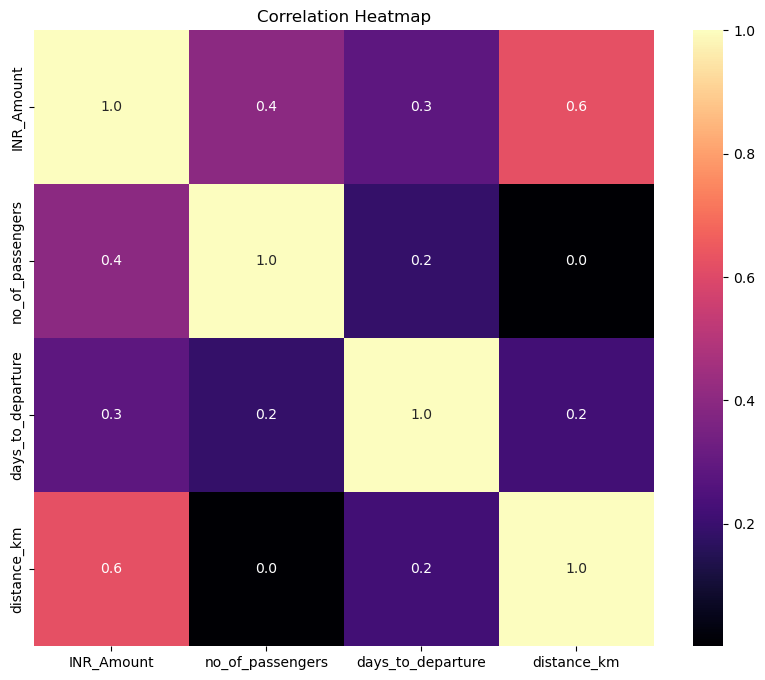

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

bookingdata=pd.read_csv('Bookings.csv')
sessiondata=pd.read_csv('Sessions.csv')

#we need select numerical columns for displaying correlations.
NumericalColumn =  bookingdata.select_dtypes(include=['number'])
print(NumericalColumn)

#Calculating the Correlation Matrix ( correlation matrix, where each element represents the correlation between two variables (columns))
correlation_matrix = NumericalColumn.corr()
print(correlation_matrix)

# creating a heatmap using correlation matrix to find report which pair
#of numerical columns in the bookings dataset, have the maximum correlation.

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
8.For each service, which is the most used device type for making bookings on the platform?

In [68]:
# Group by service name and count device types
import pandas as pd
bookingdata=pd.read_csv('Bookings.csv')

# Grouping the service name and device type using group() function.value_counts(): This function count is used to tell us how many times each device_type_used occurs.
device_counts = bookingdata.groupby('service_name')['device_type_used'].value_counts()
print(device_counts)

# Get the most used device type for each service by idxmax() function
most_used_devices = device_counts.groupby('service_name').idxmax()
print(most_used_devices)

print("Most used device type for each service:")
# items() method returns an iterable of key-value pairs and Prints the current service and its corresponding device.

for service , device in most_used_devices.items():
  print(f"{service}: {device[1]}")


service_name  device_type_used
GOIBIBO       IOS                 70
              Desktop             61
              Android             44
              MobileWeb           11
MMT           Desktop             30
              Android              8
              IOS                  5
              MobileWeb            5
YATRA         Desktop             51
              IOS                 22
              Android             18
              MobileWeb           11
              Tablet               3
Name: count, dtype: int64
service_name
GOIBIBO      (GOIBIBO, IOS)
MMT          (MMT, Desktop)
YATRA      (YATRA, Desktop)
Name: count, dtype: object
Most used device type for each service:
GOIBIBO: IOS
MMT: Desktop
YATRA: Desktop


In [ ]:
9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types,that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

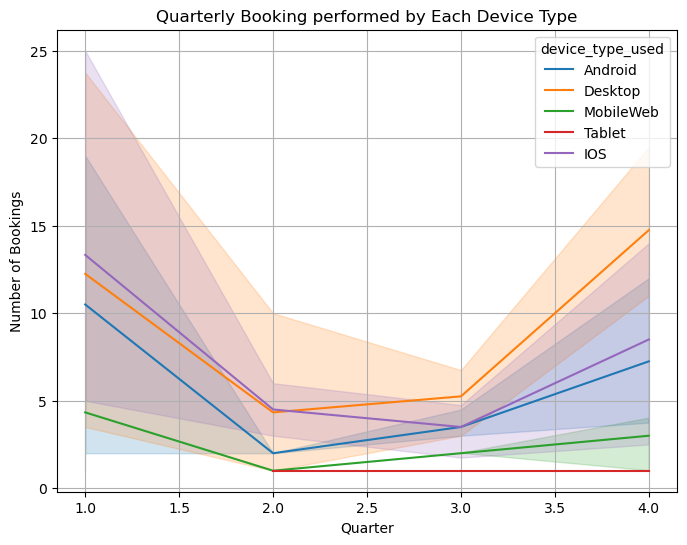

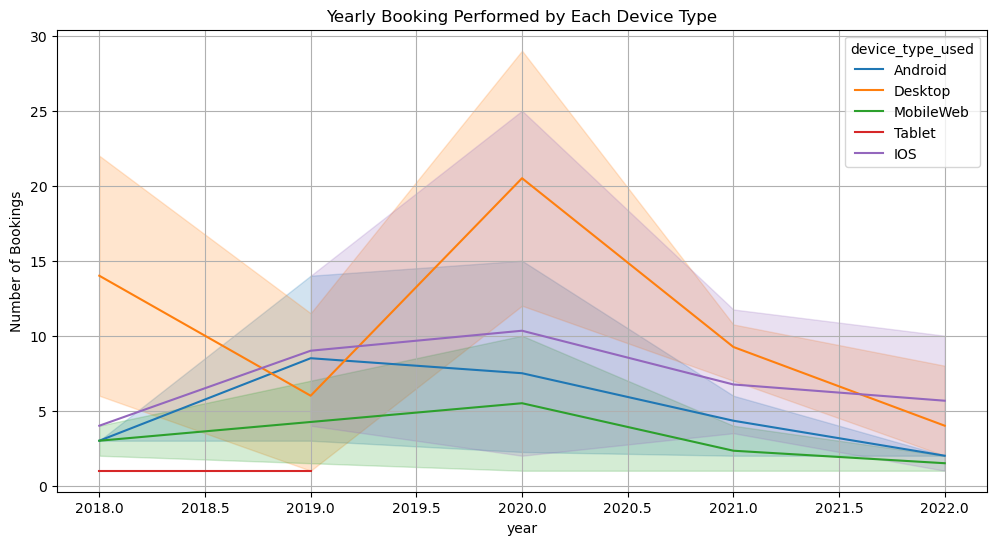

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time
bookingdata=pd.read_csv('Bookings.csv')

# Convert booking_time to datetime(pd.to_datetime() is a function in the pandas library,that is used to convert a variety of date and time formats into datetime objects.
#This is especially useful when working with time-series data,as it enables easier manipulation and extraction of time-based components like year, month, day, etc.

#to_datetime() function converts the booking_time column to a pandas datetime object to enable operations like extracting year and quarter.
bookingdata['booking_time'] = pd.to_datetime(bookingdata['booking_time'])
#print(bookingdata)

# Extracting year using dt.year and quarter using dt.quarter.

#dt.year is a pandas accessor used to extract the year from a datetime object in a pandas DataFrame

bookingdata['year'] = bookingdata['booking_time'].dt.year

#dt.quarter is a pandas accessor that extracts the quarter of the year from a datetime object.
#The quarter of the year is a number between 1 and 4.

bookingdata['quarter'] = bookingdata['booking_time'].dt.quarter

# Group by year, quarter, and device type
booking_counts = bookingdata.groupby(['year', 'quarter', 'device_type_used']).size().reset_index(name='count')


# Create time series plots
plt.figure(figsize=(8, 6))
sns.lineplot(x='quarter', y='count', hue='device_type_used', data=booking_counts)
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.title('Quarterly Booking performed by Each Device Type')
plt.grid(True)
plt.show()

# Create time series plots
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count', hue='device_type_used', data=booking_counts)
plt.xlabel('year')
plt.ylabel('Number of Bookings')
plt.title('Yearly Booking Performed by Each Device Type')
plt.grid(True)
plt.show()



In [25]:
#1O.consider the following example :12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total.Searches =100, bookings=10 customers=12. 
#The overall booking to search ratio, Obsr is 10/100=0.1.Using the above information/content,answer the following:
1.What is the Average Obsr for each month of the year?
2.What is the Average Obsr for each day of the week?
3.Plot a time series of Obsr on the given datasets.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the sessions.csv file (replace 'C:\\sessions.csv' with the actual file path)

bookingdata=pd.read_csv(r'C:\Users\Arun\Desktop\Bookings.csv')
sessiondata=pd.read_csv(r'C:\Users\Arun\Desktop\Sessions.csv')

# Convert the 'search_time' column to datetime, use mixed as option in the format if u r unsure about the pattern like YY/MM/DD

sessiondata['search_time'] = pd.to_datetime(sessiondata['search_time'], format='mixed', errors='coerce')
bookingdata['booking_time'] = pd.to_datetime(bookingdata['booking_time'], format='mixed', errors='coerce')
#print(sessiondata)

# Extract year and month
sessiondata['year'] = sessiondata['search_time'].dt.year
sessiondata['month'] = sessiondata['search_time'].dt.month

bookingdata['year'] = bookingdata['booking_time'].dt.year
bookingdata['month'] = bookingdata['booking_time'].dt.month

#search_counts = sessiondata.groupby(['year', 'month'])['search_id'].nunique().reset_index(name='total_searches')


# Calculate the total searches and bookings
total_searches = sessiondata['search_id'].nunique()
total_bookings = bookingdata['booking_id'].nunique()

# Calculate the overall booking to search ratio (OBSR)
OBSR = total_bookings / total_searches

print(f"Overall booking to search ratio (OBSR): {OBSR:.2f}")

# Calculate the average oBSR for each month
average_OBSR_monthly = bookingdata.groupby(['year', 'month'])['booking_id'].nunique() / sessiondata.groupby(['year', 'month'])['search_id'].nunique()

print("Average OBSR for each month:")
print(average_OBSR_monthly)

# Calculate the average oBSR for each day of the week
bookingdata['day_of_week'] = bookingdata['booking_time'].dt.dayofweek
sessiondata['day_of_week'] = sessiondata['search_time'].dt.dayofweek
average_OBSR_daily = bookingdata.groupby('day_of_week')['booking_id'].nunique() / sessiondata.groupby('day_of_week')['search_id'].nunique()

print("Average OBSR for each day of the week:")
print(average_OBSR_daily)






Overall booking to search ratio (OBSR): 0.25
Average OBSR for each month:
year  month
2018  9        0.387097
      10       0.095238
      11       0.243902
      12       0.193548
2019  1        0.333333
      6        1.000000
      7        0.217391
      8        0.285714
      9        0.304348
      10       0.214286
      11       0.285714
      12       0.228070
2020  1        0.226027
      2        0.306452
      3        0.300000
      5        0.111111
      6        0.333333
      7        0.100000
      8        0.666667
      9        0.375000
      10       0.545455
      11       0.407407
      12       0.666667
2021  1        0.571429
      2        0.363636
      3        0.312500
      4        0.258065
      5        0.500000
      6        0.428571
      7        0.117647
      8        0.210526
      9        0.521739
      10       0.300000
      11       0.147059
      12       0.300000
2022  1        0.350000
      2        0.275862
      3        0.179487
  